# Extract source series from World Bank WDI database download

In [80]:
%matplotlib inline 
from IPython.display import display, HTML
from datetime import date
import os
import numpy as np
import zipfile
import pandas as pd

# pandas_datareader spams FutureWarning on import
#import warnings
#warnings.filterwarnings('ignore', module='pandas_datareader')
#from pandas_datareader import wb

# find target path for data files, assuming the notebook is in the right place
data_path = _dh[0]
assert data_path.endswith(os.path.join('em-2020','data'))

In [3]:
zf = zipfile.ZipFile(os.path.join(data_path, 'WDI_csv.zip'))

In [4]:
series = pd.read_csv(zf.open('WDISeries.csv'), index_col='Series Code')

In [5]:
raw_indicators = [
    'NV.IND.TOTL.ZS',
    'NE.TRD.GNFS.ZS',
    'NE.IMP.GNFS.KD',
    'NE.EXP.GNFS.KD',
    'NY.GDP.MKTP.KD',
    'NY.GDP.PCAP.KD',
    'NY.GDP.PCAP.PP.KD',
    'EG.USE.PCAP.KG.OE',
#     'IP.PAT.RESD',
#     'IP.PAT.NRES',
#     'PA.NUS.FCRF',
]
series.loc[raw_indicators[0:], ['Indicator Name']]


,Indicator Name
Series Code,
NV.IND.TOTL.ZS,"Industry, value added (% of GDP)"
NE.TRD.GNFS.ZS,Trade (% of GDP)
NE.IMP.GNFS.KD,Imports of goods and services (constant 2010 US$)
NE.EXP.GNFS.KD,Exports of goods and services (constant 2010 US$)
NY.GDP.MKTP.KD,GDP (constant 2010 US$)
NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$)
NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation..."
EG.USE.PCAP.KG.OE,Energy use (kg of oil equivalent per capita)


In [6]:
countries = pd.read_csv(zf.open('WDICountry.csv'),  index_col='Country Code')
# countries.loc[['ARB', 'WLD', 'FRA', 'IND'], :]
countries.loc[~countries['Region'].isnull() & countries['National accounts base year'].isnull()]

,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
Country Code,,,,,,,,,,,,,,,,,,,,,
FRO,Faroe Islands,Faroe Islands,Faroe Islands,FO,Danish krone,NaN,Europe & Central Asia,High income,FO,NaN,...,NaN,NaN,2011,NaN,NaN,Yes,NaN,NaN,2017.0,NaN
GIB,Gibraltar,Gibraltar,Gibraltar,GI,Gibraltar pound,NaN,Europe & Central Asia,High income,GI,NaN,...,NaN,NaN,2012,NaN,NaN,Yes,NaN,NaN,NaN,NaN
MAF,St. Martin (French part),St. Martin (French part),St. Martin (French part),MF,Euro,NaN,Latin America & Caribbean,High income,MF,NaN,...,NaN,NaN,2015,NaN,NaN,Yes,NaN,NaN,2015.0,NaN
PRK,Dem. People's Rep. Korea,"Korea, Dem. People's Rep.",Democratic People's Republic of Korea,KP,Democratic People's Republic of Korean won,NaN,East Asia & Pacific,Low income,KP,NaN,...,NaN,NaN,2019,"Multiple Indicator Cluster Survey, 2017",NaN,NaN,NaN,NaN,2016.0,NaN
VGB,British Virgin Islands,British Virgin Islands,British Virgin Islands,VG,U.S. dollar,NaN,Latin America & Caribbean,High income,VG,NaN,...,NaN,NaN,2010,"STEPS Risk Factor Survey, 2010",NaN,Yes,NaN,NaN,NaN,NaN


In [15]:
country_groups = pd.read_excel(os.path.join(data_path, 'CLASS.xls'), sheet_name='Groups')
country_group_map = {k: set(v['CountryCode']) for k, v in country_groups.groupby('GroupCode')}
all_countries = country_group_map['WLD']
country_group_map['CEB']

{'BGR', 'CZE', 'EST', 'HRV', 'HUN', 'LTU', 'LVA', 'POL', 'ROU', 'SVK', 'SVN'}

In [11]:
data = pd.read_csv(zf.open('WDIData.csv'))

In [75]:
# The last column in the CSV file is empty
data.dropna(axis='columns', how='all', inplace=True)

In [76]:
data.loc[data['Indicator Code'].isin(raw_indicators)].sample(2).iloc[:, -10:]

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
139271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288102,5082.354757,5360.226632,5642.578115,5919.209568,5996.496965,6114.227214,6262.368905,6314.291438,6453.560525,6486.634618


In [50]:
is_country = data['Country Code'].isin(all_countries)
is_world = data['Country Code'] == 'WLD'
other_cols = ['Indicator Name', 'Indicator Code', 'Country Name']

In [51]:
exports = data.loc[is_country & (data['Indicator Code'] == 'NE.EXP.GNFS.CD')].set_index('Country Code').drop(columns=other_cols)
imports = data.loc[is_country & (data['Indicator Code'] == 'NE.IMP.GNFS.CD')].set_index('Country Code').drop(columns=other_cols)
gdp = data.loc[is_country & (data['Indicator Code'] == 'NY.GDP.MKTP.CD')].set_index('Country Code').drop(columns=other_cols)
trade_pct = data.loc[is_country & (data['Indicator Code'] == 'NE.TRD.GNFS.ZS')].set_index('Country Code').drop(columns=other_cols)

In [53]:
actual = imports.add(exports, fill_value=0.) / gdp * 100
(trade_pct.unstack() - actual.unstack()).dropna().sort_values()

      Country Code
2004  SGP            -1.705303e-12
1977  SGP            -1.648459e-12
2015  MLT            -1.591616e-12
2009  HKG            -1.477929e-12
2006  SGP            -1.307399e-12
                          ...     
2017  MLT             1.136868e-12
1975  BRN             1.151079e-12
2014  MLT             1.193712e-12
2018  LUX             1.193712e-12
1982  MAC             1.477929e-12
Length: 8392, dtype: float64

/home/drake/.virtualenvs/em-2020/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

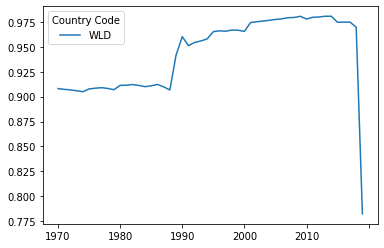

In [63]:
world_imports = data.loc[is_world & (data['Indicator Code'] == 'NE.IMP.GNFS.CD')].set_index('Country Code').drop(columns=other_cols)
world_exports = data.loc[is_world & (data['Indicator Code'] == 'NE.EXP.GNFS.CD')].set_index('Country Code').drop(columns=other_cols)

imports.sum().divide(world_imports).T.dropna().plot()

/home/drake/.virtualenvs/em-2020/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

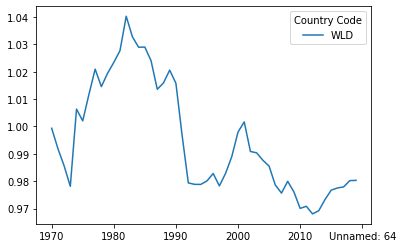

In [65]:
world_imports.divide(world_exports).T.plot()

Country Code
AFG    2.111111e+08
ALB             NaN
DZA    1.195034e+09
ASM             NaN
AND             NaN
           ...     
VIR             NaN
PSE             NaN
YEM             NaN
ZMB             NaN
ZWE             NaN
Name: 1969, Length: 217, dtype: float64